[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1.]
[task 2] At t=60 [A]=0.8353 mol/L, [B]=0.1597 mol/L, [C]=0.0050 mol/L
[task 3] For t=230.63s => [A]=0.5006 mol/L, [B]=0.4401 mol/L, [C]=0.0593 mol/L
[task 4] For t=255.86s => [A]=0.4641 mol/L, [B]=0.4652 mol/L, [C]=0.0707 mol/L
[task 5] [Approach 1] For t=547.75s => [B]max=0.5773 mol/L


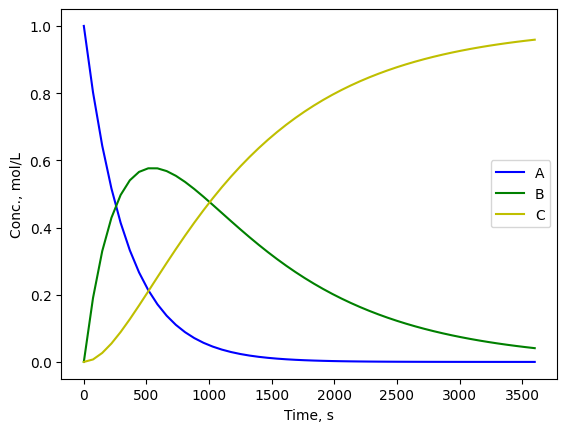

In [8]:
#
# Example
#
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint # to solve ODE numerically

# The process: A -> B, k1; B -> C, k2
def model(y, t):
    A = y[0] # unpack variables
    B = y[1]
    C = y[2]
    dAdt = -k1*A # calculate derivatives
    dBdt = k1*A-k2*B
    dCdt = k2*B
    return [dAdt, dBdt, dCdt] # return derivatives


# Parameters
k1 = 3e-3 # L/(mol s)
k2 = 1e-3 # L/(mol s)

A0 = 1 # mol/L
B0 = 0 # mol/L
C0 = 0 # mol/L
# Time span
t = np.linspace(0, 3600) # 0 - 1200s
# Initial conditions
ic = [A0, B0, C0]


# Integrate numerically ODEs
results = odeint(model, ic, t)

# Unpack concentrations
A = results[:,0]
B = results[:,1]
C = results[:,2]

# moles balance:
print(A+B+C) # should be A0

# task 1: caoncantration profiles
plt.plot(t, A, 'b-', label = 'A')
plt.plot(t, B, 'g-', label = 'B')
plt.plot(t, C, 'y-', label = 'C')
plt.ylabel('Conc., mol/L')
plt.xlabel('Time, s')
plt.legend()



# task 2: concentrations after 60s of the reaction:
t0=0  #s
t1=60 #s
results = odeint(model, ic, [t0,t1])
A,B,C=results[1,:]
print("[task 2] At t={} [A]={:.4f} mol/L, [B]={:.4f} mol/L, [C]={:.4f} mol/L".format(t1, A, B, C))



# task 3: reaction time after which the concentration of A is 0.5 mol/L
Ax = 0.5
t0=0  # initial conditions
eps = 0.001 # precision ---- try other values

t_range = np.linspace(0,3600,1000) # 1000 steps
for t1 in t_range:
    results = odeint(model, ic, [t0,t1])
    A,B,C=results[1,:]
    if np.abs(A-Ax) < eps:
        print("[task 3] For t={:.2f}s => [A]={:.4f} mol/L, [B]={:.4f} mol/L, [C]={:.4f} mol/L".format(t1, A, B, C))



# task 4: reaction time after which the concentration of A is equal to concentration of B

t0=0  # initial conditions
eps = 0.005 # precision ---- try other values

t_range = np.linspace(0,3600,1000) # 1000 steps
for t1 in t_range:
    results = odeint(model, ic, [t0,t1])
    A,B,C=results[1,:]
    if np.abs(A-B) < eps:
        print("[task 4] For t={:.2f}s => [A]={:.4f} mol/L, [B]={:.4f} mol/L, [C]={:.4f} mol/L".format(t1, A, B, C))



# task 5: reaction time after which the concentration of B is maximal

t0=0  # initial conditions
# Approach no 1
Bmax = 0
tmax = 0

t_range = np.linspace(0,3600,1000) # 1000 steps <--- try other values
for t1 in t_range:
    results = odeint(model, ic, [t0,t1])
    A,B,C=results[1,:]
    if B > Bmax:
        Bmax = B
        tmax = t1

print("[task 5] [Approach 1] For t={:.2f}s => [B]max={:.4f} mol/L".format(tmax, Bmax))



[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1.]


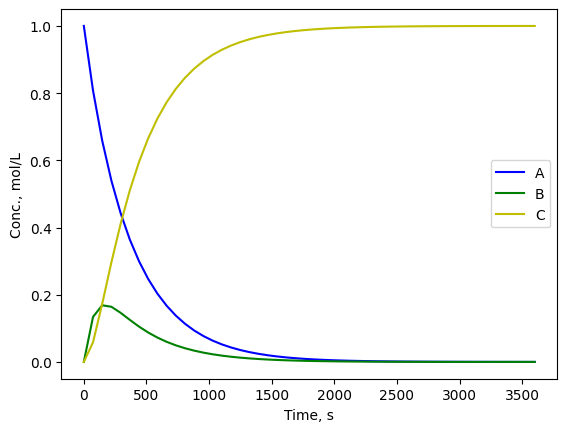

In [9]:
#
# Exercise
#
# Calculate the reaction time after which:
# [B]=max
# [A]=[B]
# [B] = 2x[A]
# [B] = 90% [A]0



import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint # to solve ODE numerically

# The process: A -> B, k1; B -> A, k3;  B -> C, k2
# Parameters
#k1 = 3e-3 # L/(mol s)
#k2 = 10e-3 # L/(mol s)
#k3 = 1e-3 # L/(mol s)

#A0 = 1 # mol/L
#B0 = 0 # mol/L
#C0 = 0 # mol/L
# Time span
#t = np.linspace(0, 3600) # 0 - 1200s

def model(y, t):

    # unpack variables
    A = y[0]
    B = y[1]
    C = y[2]

    # calculate derivatives
    dAdt = -k1*A + k3*B
    dBdt = k1*A-k2*B -k3*B
    dCdt = k2*B

    return [dAdt, dBdt, dCdt] # return derivatives


# Parameters
k1 = 3e-3 # L/(mol s)
k2 = 10e-3 # L/(mol s) # set 0 to switch-off the after equilibria step
k3 = 1e-3 # L/(mol s)

A0 = 1 # mol/L
B0 = 0 # mol/L
C0 = 0 # mol/L
# Time span
t = np.linspace(0, 3600) # 0 - 1200s
# Initial conditions
ic = [A0, B0, C0]


# Integrate numerically ODEs
results = odeint(model, ic, t)

# Unpack concentrations
A = results[:,0]
B = results[:,1]
C = results[:,2]

# moles balance:
print(A+B+C) # should be A0

# Plot the results
plt.plot(t, A, 'b-', label = 'A')
plt.plot(t, B, 'g-', label = 'B')
plt.plot(t, C, 'y-', label = 'C')
plt.ylabel('Conc., mol/L')
plt.xlabel('Time, s')
plt.legend()
